In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 
import joblib 
import warnings 

warnings.filterwarnings('ignore')

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ncc\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [21]:
# url = r"C:\Users\John Doe\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1\WineQT.csv"
url = r"C:\Users\ncc\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1\WineQT.csv"
df = pd.read_csv(url)

In [22]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [23]:
def check_info(data):
    print("checking data info....")
    print(data.info())

    print()
    print("basic statistics of data")
    print(data.describe().T)

check_info(df)

checking data info....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

basic statistics of data
                     

In [24]:
df['quality'] = df['quality'].map({9: "Excellent", 8: "Very good", 7: "Very good", 6: "Good", 5: "Good", 4: "Bad", 3: "Bad"})
df['quality']

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
1138    Good
1139    Good
1140    Good
1141    Good
1142    Good
Name: quality, Length: 1143, dtype: object

In [25]:
# scaling numeric features using sklearn standard scaler
numcols = [x for x in df.columns if df[x].dtype == "float64"]
df[numcols]
scaler = StandardScaler()
df[numcols] = scaler.fit_transform(df[numcols])
print("After")
df[numcols]

After


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.151292,-0.118842,-0.703785,-0.171289,-0.231395,1.306316,-0.180503,-0.514707,0.695966,0.541862,0.515741
1139,-0.865059,0.493785,-0.958109,-0.466421,-0.400719,1.208717,-0.241539,-0.114545,0.695966,0.952843,-0.870937
1140,-1.208538,0.382399,-0.958109,-0.392638,0.064922,1.599113,-0.058432,-0.951246,0.887542,-0.456235,0.053515
1141,-1.380278,0.103932,-0.856379,-0.245072,-0.527712,2.282306,0.155192,-0.836914,1.334554,0.600574,0.700632


Training Logistic Regression
Logistic Regression Evaluation Metrics
Accuracy score: 
0.7937062937062938
Classification Report: 
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        10
        Good       0.84      0.93      0.88       231
   Very good       0.43      0.27      0.33        45

    accuracy                           0.79       286
   macro avg       0.42      0.40      0.40       286
weighted avg       0.74      0.79      0.76       286



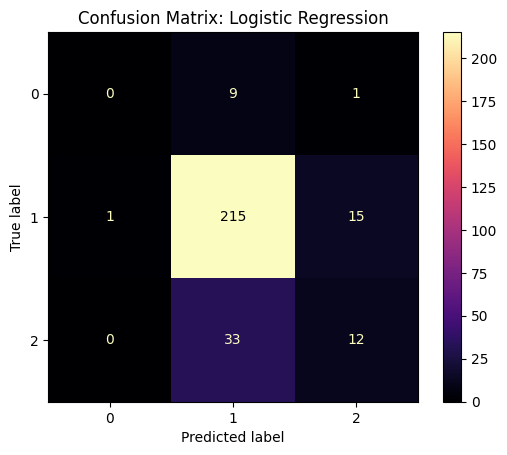

Training Decision Tree Classifier
Decision Tree Classifier Evaluation Metrics
Accuracy score: 
0.7937062937062938
Classification Report: 
              precision    recall  f1-score   support

         Bad       0.29      0.20      0.24        10
        Good       0.88      0.87      0.88       231
   Very good       0.47      0.53      0.50        45

    accuracy                           0.79       286
   macro avg       0.55      0.53      0.54       286
weighted avg       0.80      0.79      0.79       286



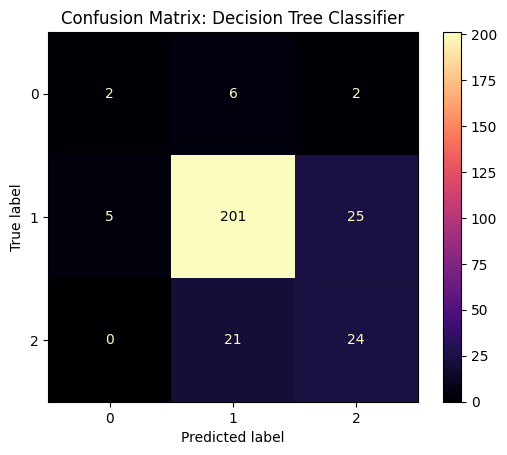

Training Naive Bayes Classifier
Naive Bayes Classifier Evaluation Metrics
Accuracy score: 
0.7482517482517482
Classification Report: 
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        10
        Good       0.86      0.82      0.84       231
   Very good       0.40      0.53      0.46        45

    accuracy                           0.75       286
   macro avg       0.42      0.45      0.43       286
weighted avg       0.76      0.75      0.75       286



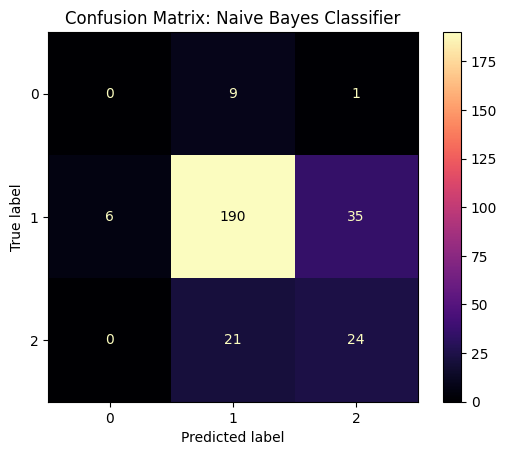

Training Random Forest Classifier
Random Forest Classifier Evaluation Metrics
Accuracy score: 
0.8496503496503497
Classification Report: 
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        10
        Good       0.87      0.96      0.91       231
   Very good       0.70      0.47      0.56        45

    accuracy                           0.85       286
   macro avg       0.52      0.48      0.49       286
weighted avg       0.81      0.85      0.82       286



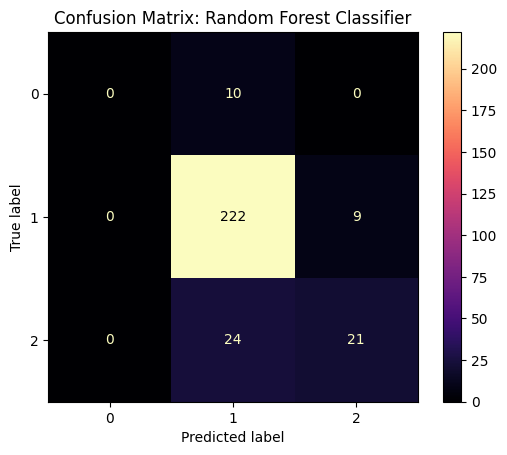

['encoder.pkl']

In [26]:
# modellling

X, y = df.drop("quality", axis = 1), df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, )
models = {
          "Logistic Regression": LogisticRegression(random_state = 0),
          "Decision Tree Classifier": DecisionTreeClassifier(random_state = 0),
          "Naive Bayes Classifier": GaussianNB(),
          "Random Forest Classifier": RandomForestClassifier(random_state = 0)
          }

results = {}
for model_name, model in models.items():
    print(f'Training {model_name}')
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f'{model_name} Evaluation Metrics')
    print(f'Accuracy score: \n{accuracy_score(y_test, prediction)}')
    print(f'Classification Report: \n{classification_report(y_test, prediction)}')
    results[f'{model_name} Accuracy'] = accuracy_score(y_test, prediction)

    cm = confusion_matrix(y_test, prediction)
    display = ConfusionMatrixDisplay(confusion_matrix=cm)
    display.plot(cmap = "magma")
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

    if model_name == "Random Forest Classifier":
        joblib.dump(model, "bestmodel.pkl")
        
joblib.dump(scaler, 'encoder.pkl')

In [27]:
# joblib.dump(RandomForestClassifier(), "bestmodel.pkl")

In [28]:
model = RandomForestClassifier(random_state = 0)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# hyperparameter tuning
param_grid = {
              "n_estimators": [100, 200, 300, 400, 500, 600],
              "max_depth": [3, 4, 5, 6, 7, 8, 9],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 10, 11]
              }
randomsearch = RandomizedSearchCV(estimator = model, scoring = "accuary", cv = 5, random_state = 0, param_distributions = param_grid)
randomsearch.fit(X_train, y_train)

In [ ]:
print('Results:')
print(randomsearch.best_score_)
print(randomsearch.best_params_)

In [ ]:
bestm